# Practical: RTree and NetworkX

**28th November 2019 – 11am to 1pm**

**Christopher Ingold Building G20** 

In this practical we will be looking at the various methods for reading geospatial information represented by a graph network.

In this practical we shall be working on Ordnance Survey Mastermap Integrated Transport Network data that covers the island of Mersea in Essex. The OS data has been downloaded from Edina Digimap and has been cleaned up in QGIS.  You must use this data in accordance with the Educational User Licence that you agreed to when you signed up to Edina Digimap.

All OS data is © Crown copyright and database rights 2018 Ordnance Survey.

## RTree

Rtree is a ctypes Python wrapper of libspatialindex that provides a number of advanced spatial indexing features for the spatially curious Python user.

If you have not installed it yet, you can execute this code cell to install the rtree package:

In [1]:
!conda install -y rtree=0.8.3

Solving environment: done

# All requested packages already installed.



To use rtree, we need to import the object index:

In [2]:
from rtree import index

After importing the index module, we build an index with using its default constructor:

In [3]:
idx = index.Index()

After instantiating the index, we create a bounding box that we insert into the index:

In [4]:
br = (0.0, 0.0, 1.0, 1.0)

We now insert an entry into the index:

In [5]:
idx.insert(0, br)

We also add 10,000 squares of length 0.99 into the index:

In [6]:
for i in range(100):
    for j in range(100):
        idx.insert(i*100 + j, (i, j, i+0.99, j+0.99))

We can query the index using `intersection`. This will return the indexed entries that cross or are contained within the given query window.

In [7]:
for i in idx.intersection((1.0, 1.0, 2.0, 2.0)):
    print(i)

0
101
102
202
201


We can query the index using nearest. This will return the nearest indexed entries to the given query point. If multiple items are of equal distance to the bounds, both are returned:

In [8]:
for i in idx.nearest((0.8, 0.8), 1):
    print(i)

0
0


# Exercise 33

Create a Polygon using Shapely and index their Minimum Bounding Rectangles, then query the index using a point using the intersection method.

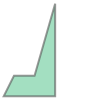

In [9]:
from shapely.geometry import Polygon

polygon = Polygon([(0, 0), (1, 2), (3, 2), (5, 9), (5, 0)])
polygon

In [10]:
idx.insert(123456789, polygon.bounds)

In [11]:
for i in idx.intersection((0, 2)):
    print(i)

2
123456789


## Introduction to NetworkX

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

If you have not installed this package before, you can install this by running this command:

In [12]:
!conda install -y networkx=2.4

Solving environment: done

# All requested packages already installed.



Now we can import `networkx` like this:

In [13]:
import networkx as nx

We start creating a small graph consisting of 5 nodes and 4 edges. Nodes can either be added individually (`add_node`) or from a list (`add_nodes_from`).

In [14]:
g = nx.Graph()

We add a node:

In [15]:
g.add_node(1)

Or multiple nodes by using a list:

In [16]:
g.add_nodes_from([2,3,4,5])

We can then access the nodes via `nodes`:

In [17]:
g.nodes

NodeView((1, 2, 3, 4, 5))

We have the option to add attributes to nodes. In this example, we iterate through the nodes in the graph and apply a value `"green"` to a `"color"` attribute key. Then assign a `"red"` to the `"color"` attribute in Node 1.

In [18]:
for node in g.nodes:
    g.nodes[node]["color"] = "green"
g.nodes[1]["color"] = 'red'

We can display the nodes using `draw`. Before using the `draw` method, generate a list of colors that corresponds to the node `color` attributes.

Note: The standard method for obtaining a value from a dictionary is `dictionary[key]`. An alternative method is to use the `.get` method which allows for a default value if the key does not exist.

In [19]:
node_colors = []
for node in g.nodes:
    node_colors.append(g.nodes[node].get('color','blue'))
    
nx.draw(g, with_labels=True, node_color=node_colors)

Nodes are only one part of a graph. Edges are the connections between nodes. We can add edges by specifying the two nodes that the edge connects. Attributes can be added at the same time as the edges are created. 

In [20]:
g.add_edge(0, 1, color="blue")
g.add_edges_from([(0,2), (0,3), (0,4), (0,5)], color="purple")

We can now draw the graph with the edges connected. Note that an `edge_colors` list can be generated in much the same way a `node_colors` list.

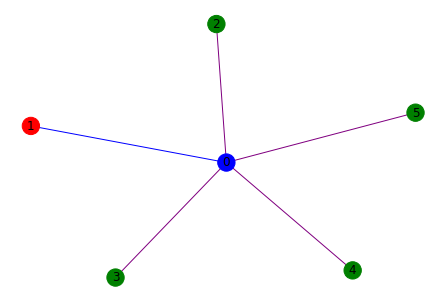

In [21]:
node_colors = []
for node in g.nodes:
    node_colors.append(g.nodes[node].get('color','blue'))
    
edge_colors = []
for u, v in g.edges:
    edge_colors.append(g.edges[u, v].get('color', 'black'))

nx.draw(g, with_labels=True, node_color=node_colors, edge_color=edge_colors)

To avoid repeating code every time we need to draw a graph, let's define a function for creating the color lists `node_colors` and `edge_colors`.

In [22]:
def obtain_colors(graph, default_node="blue", default_edge="black"):
    node_colors = []
    for node in graph.nodes:
        node_colors.append(graph.nodes[node].get('color', default_node))
    edge_colors = []
    for u, v in graph.edges:
        edge_colors.append(graph.edges[u, v].get('color', default_edge))
    return node_colors, edge_colors

Graphs can be joined together in networkx using the `compose` function.

To demonstrate `compose` let's make a new graph `h` with its own color scheme.

In [23]:
h = nx.Graph()

h.add_edges_from([(1,6),(1,7),(1,8),(1,9)], color="purple")
for node in h.nodes:
    h.nodes[node]['color'] = "grey"
h.nodes[1]['color']  = 'pink'

We display this new graph:

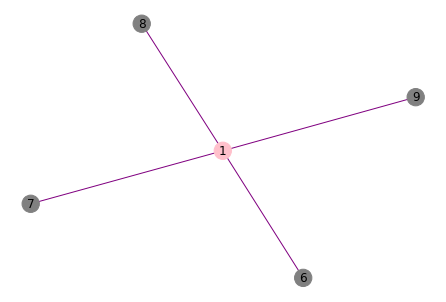

In [24]:
node_colors2, edge_colors2 = obtain_colors(h)

nx.draw(h, with_labels=True, node_color=node_colors2, edge_color=edge_colors2)

Now let's combine the 2 graphs together using compose. We first draw the graph gh, where the attributes of h override the attributes of g:

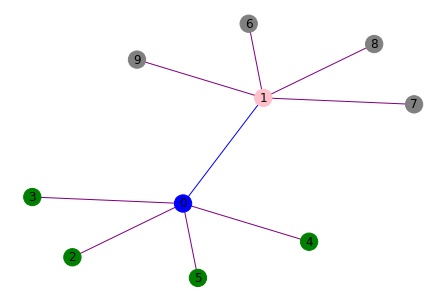

In [25]:
gh = nx.compose(g, h)

node_colors_gh, edge_colors_gh = obtain_colors(gh)
nx.draw(gh, with_labels=True, node_color=node_colors_gh, edge_color=edge_colors_gh)

We now draw the graph hg with g overriding h. Note how Node 1 is pink in gh and red in hg:

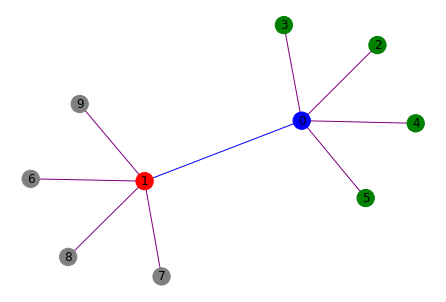

In [26]:
hg = nx.compose(h, g)

node_colors_hg, edge_colors_hg = obtain_colors(hg)
nx.draw(hg, with_labels=True, node_color=node_colors_hg, edge_color=edge_colors_hg)

In `networkx` the functionality exists to create graphs of certain shapes using built-in functions. We can add a rectangular grid or a hexagon graph using the code below.

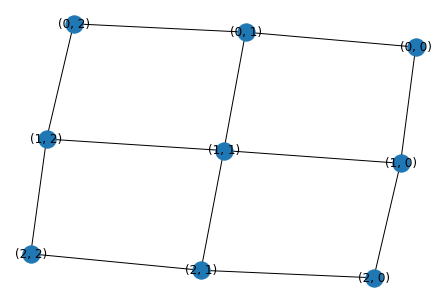

In [27]:
m = nx.grid_2d_graph(3,3)
nx.draw(m, with_labels=True)

We can also build a graph with the shape of hexagons:

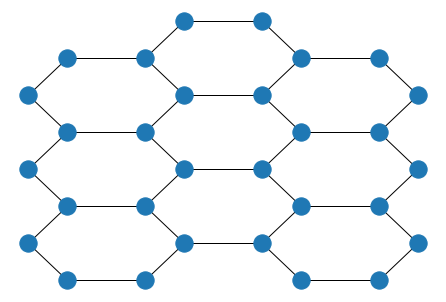

In [28]:
n = nx.hexagonal_lattice_graph(3, 3, with_positions=True)

pos = {}
for node in n.nodes:
    pos[node] = n.nodes[node]['pos']

nx.draw(n, pos=pos)

The Dijkstra algorithm can be used to find the shortest distance between two nodes. The algorithm returns a list of nodes starting with the start node specified.

For the purposes of this exercise we shall be creating our a rectangular grid using the functions below.
This rectangular grid differs from the built-in grid in that the node id is an integer rather than a tuple pair.

In [29]:
def get_node_id(r, c, w):
    return w * r + c 

def make_2d_grid(h, w):
    pos = {} # contains a co-ordinate positions to assist drawing
    g = nx.Graph()
    for r in range(h):
        for c in range(w):
            if c != w-1: 
                g.add_edge(get_node_id(r, c, w), get_node_id(r, c+1, w), weight=1.0, length=1.0, color="black")
            if r != h-1: 
                g.add_edge(get_node_id(r, c, w), get_node_id(r+1, c, w), weight=1.0, length=1.0, color="black")
            pos[get_node_id(r, c, w)]= (-1 + (c * 2 / w), 1 - (r * 2 / h))
            g.nodes[get_node_id(r, c, w)]['color'] = 'red'
    return g, pos

Using the `make_2d_grid function` create a 3x3 grid r and its associated position information (`pos`). This will improve the visual layout of the plotted graph. 

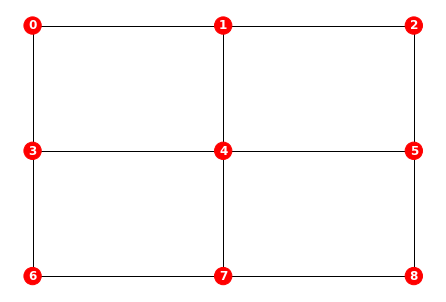

In [30]:
r, pos = make_2d_grid(3,3)

node_colors, edge_colors = obtain_colors(r)

nx.draw(r, pos=pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=node_colors, font_color="white")

We can use the `dijkstra_path` algorithm to calculate to shortest path between nodes 3 and 8. When calculating the shortest path the `"weight"` attribute is passed to the `weight` keyword argument. 

In [31]:
path = nx.dijkstra_path(r, source=3, target=8, weight="weight")
path

[3, 4, 5, 8]

Does the returned path connect nodes 3 to 8?

Next we shall define a function to color the graph to show the shortest path that we just created.

In [32]:
def color_path(g, path, color="blue"):
    res = g.copy()
    first = path[0]
    for node in path[1:]:
        res.edges[first, node]["color"] = color 
        first = node
    return res

We then use the function to apply the colors to the graph and plot:

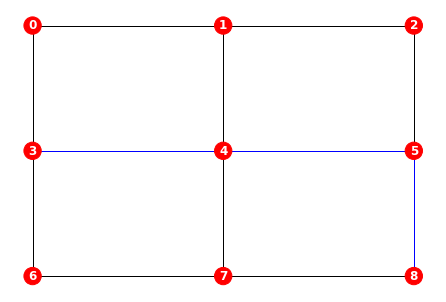

In [33]:
r_new = color_path(r, path)
node_colors, edge_colors = obtain_colors(r_new)

nx.draw(r_new, pos=pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=node_colors, font_color="white")

A Digraph is a graph in which the edges are directed from a start node to an end node. 

We use the `to_directed` function on the rectangular grid `r` created in the previous code cells to create a new digraph `d`.

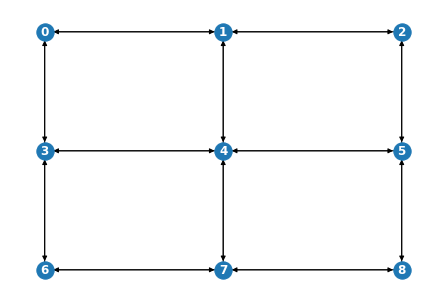

In [34]:
d = r.to_directed()

node_colors, edge_colors = obtain_colors(d)
nx.draw(d, pos=pos, with_labels=True, font_weight='bold', edge_color=edge_colors, font_color="white")

We use the `remove_edge` method to remove an edge in a specified direction. Then, we plot this again. Notice how there is only one arrow on the edge between nodes 4 and 5.

In [35]:
d.remove_edge(4,5) 

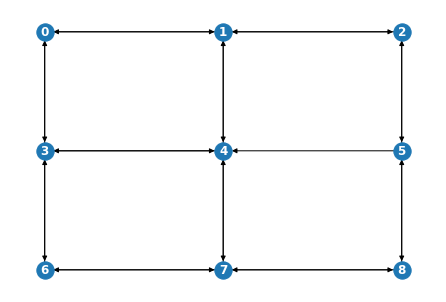

In [36]:
node_colors, edge_colors = obtain_colors(d)

nx.draw(d, pos=pos, with_labels=True, font_weight='bold', edge_color=edge_colors, font_color="white")

Now we recalculate the shortest path using the grid with the unidirectional edge:

In [37]:
path_1 = nx.dijkstra_path(d, source=3, target=8, weight="weight")
path_1

[3, 4, 7, 8]

We color the graph and path. (This function is no longer ideal because the opposing edge remains the original colour.)

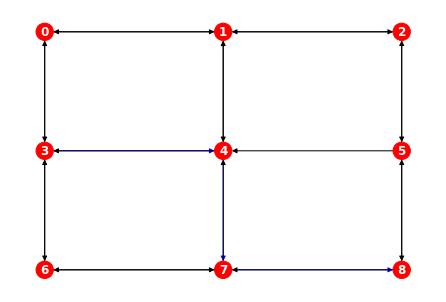

In [38]:
d_1 = color_path(d, path_1)

node_colors, edge_colors = obtain_colors(d_1)

nx.draw(d_1, pos=pos, with_labels=True, font_weight='bold', edge_color=edge_colors, node_color=node_colors, font_color="white")

# Exercise 34

Create a 5 by 5 hexagonal graph, then compute and color the shortest path from node 2 to node 20. 

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (1, 9)]


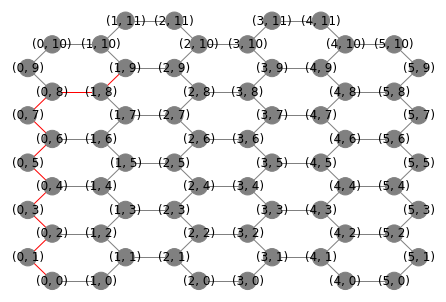

In [39]:
n = nx.hexagonal_lattice_graph(5, 5, with_positions=True)

pos = {}
i = 0
for node in n.nodes:
    pos[node] = n.nodes[node]['pos']
    if i == 0:
        node_source = node
    elif i == 20:
        node_target = node
    i = i + 1
        
path = nx.dijkstra_path(n, source=node_source, target=node_target)
print(path)

n = color_path(n, path, "red")

node_colors, edge_colors = obtain_colors(n, "gray", "gray")

nx.draw(n, pos=pos, with_labels=True, font_color="black", edge_color=edge_colors, node_color=node_colors)

## Network Analysis of Integrated Traffic Network

For the final step we shall perform Dijkstra Analysis on the road network of Mersea Island.

The ITN data has been extracted form a GML file that is downloadable from Edina Digimap. Having been cleaned up it has been saved as a JSON file for convenient reading in this exercise. Open the JSON file in a text editor to view the information that has been extracted. 

The information has been divided up into four sections.

- `roadlinks` - a dictionary of roadlinks indexed by feature ID containing:
   - 'start' - the feature ID of the start node
   - 'end' - the feature ID of the end node
   - 'natureOfRoad' - e.g. Single Carriageway
   - 'descriptiveTerm' - e.g. Local Street
   - 'length' - the length of the roadlink between nodes.
   - 'coords' - a linestring of BNG coordinates from start node to end node.
   
- `roadnodes` - a dictionary of roadnodes indexed by feature ID containing:
    - 'coords' - the BNG coordinate of the node

- `road` - a dictionary of "roads" indexed by feature ID containing
    - 'Primary' - True if the road is a primary route
    - 'roadName' - the name of the road e.g. "M25" or "Gower Street"
    - 'links' - the feature IDs of roadlinks that make up the road.
 
- `routeinfo` - a dictionary of oneway route indexed by feature ID

    - 'oneway' - a list of tuples containing feature ID of roadlinks and a direction indicator.
    - A `'+'` indicates that the direction of permitted travel is from start node to end node of the roadlink.
    - A `'-'` indicates that the direction of permitted travel is from end node to start node of the roadlink.
            

In [40]:
import json 

mersea_itn_json = "8 - Material/itn/mersea_itn.json"
with open(mersea_itn_json, "r") as f:
    mersea_itn=json.load(f)

We now create the graph from the dictionary loaded from the JSON file. For this exercise we shall be creating a simple undirected graph. Any parallel edges will be overwritten as the graph is built up. 

In [41]:
g = nx.Graph()
road_links = mersea_itn['roadlinks']
for link in road_links:
    g.add_edge(road_links[link]['start'], road_links[link]['end'], fid = link, weight = road_links[link]['length'])

We now inspect the graph. 

Note: This plot is unlikely to be meaningful.

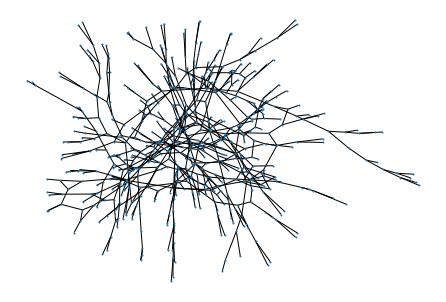

In [42]:
nx.draw(g, node_size=1)

We shall now find the shortest path between two nodes on this island road network. Picking two nodes at random.

In [43]:
start = "osgb5000005124619786"
end = "osgb4000000029329827"

path = nx.dijkstra_path(g, source=start, target=end, weight="weight")
path

['osgb5000005124619786',
 'osgb5000005193190825',
 'osgb4000000029191418',
 'osgb4000000029191419',
 'osgb5000005124619791',
 'osgb5000005124619795',
 'osgb5000005124619775',
 'osgb4000000029191416',
 'osgb5000005124620014',
 'osgb5000005124619992',
 'osgb5000005124619909',
 'osgb4000000029191424',
 'osgb4000000029191425',
 'osgb5000005193190816',
 'osgb4000000029191423',
 'osgb5000005193190812',
 'osgb4000000029191422',
 'osgb4000000029191426',
 'osgb4000000029191421',
 'osgb4000000029191399',
 'osgb4000000029191400',
 'osgb4000000029191397',
 'osgb4000000029191394',
 'osgb4000000029191391',
 'osgb4000000029191389',
 'osgb4000000029191383',
 'osgb4000000029191379',
 'osgb4000000029329841',
 'osgb4000000029191386',
 'osgb4000000029191385',
 'osgb4000000029346457',
 'osgb4000000029191322',
 'osgb4000000029191321',
 'osgb4000000029191320',
 'osgb4000000029329811',
 'osgb4000000029191319',
 'osgb4000000029191311',
 'osgb4000000029191250',
 'osgb4000000029191251',
 'osgb4000000029191242',


We will use the `color_path` function that we created earlier to color the graph network and then plot it:

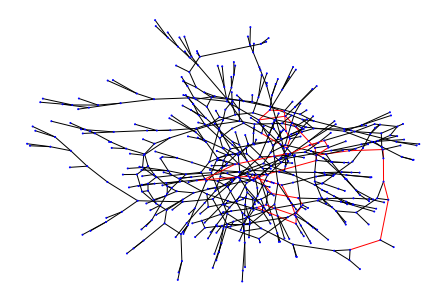

In [44]:
g_1 = color_path(g, path, "red")

node_colors, edge_colors = obtain_colors(g_1)

nx.draw(g_1, node_size=1, edge_color=edge_colors, node_color=node_colors)

The final step of this part is to create a GeoDataFrame of the shortest path and then display it on top of a raster. We shall be using the following packages and the background map.

In [45]:
import rasterio
import pyproj
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import LineString

mersea_background = "8 - Material/oml/oml-raster_2683809.tif"

The first step is to iterate through each of the nodes on the shortest path calculated. Ignore the first node, but instead assign it to a variable called `first_node`. Starting with the second node, we find the `fid` of road link that connects the `first_node` and `node`. Knowing the roadlink `fid`, we can find the coordinates and make a `shapely` LineString object. The final step of each iteration is to set `first_node` so that it can be used in the next iteration. 

On each iteration we append the feature id and the geometry to two lists `links` and `geom` which are used to build the `path_gpd` GeoDataFrame.

In [46]:
links = [] # this list will be used to populate the feature id (fid) column
geom  = [] # this list will be used to populate the geometry column

first_node = path[0]
for node in path[1:]:
    link_fid = g.edges[first_node, node]['fid']
    links.append(link_fid)
    geom.append(LineString(road_links[link_fid]['coords']))
    first_node = node

shortest_path_gpd = gpd.GeoDataFrame({"fid": links, "geometry": geom})

The route generated can be checked in the Jupyter notebook.

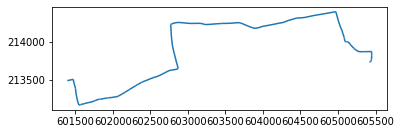

In [47]:
shortest_path_gpd.plot()

In order to view the route, load the background map and apply the colormap to the array.

In [48]:
background = rasterio.open(str(mersea_background))
back_array = background.read(1)
palette = np.array([value for key, value in background.colormap(1).items()])
background_image = palette[back_array]
bounds = background.bounds
extent = [bounds.left, bounds.right, bounds.bottom,  bounds.top]
display_extent = [bounds.left+200, bounds.right-200, bounds.bottom+600, bounds.top-600]

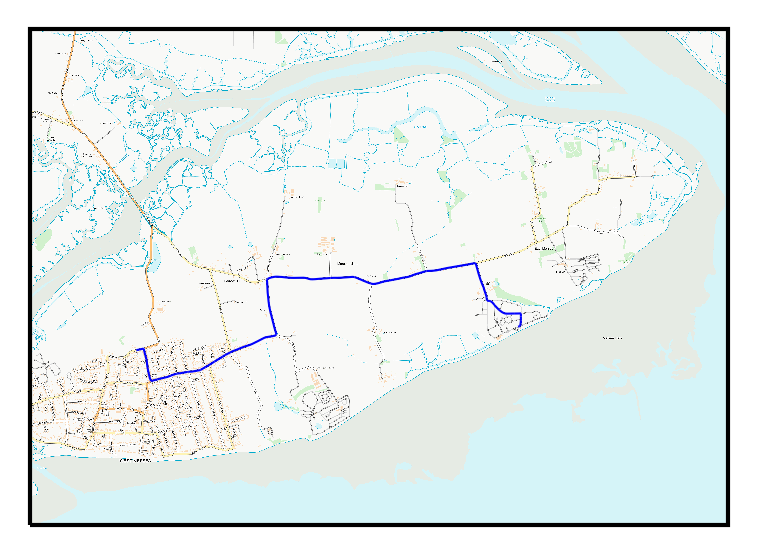

In [49]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.OSGB())

ax.imshow(background_image, origin="upper", extent=extent, zorder=0)

shortest_path_gpd.plot(ax=ax, edgecolor="blue", linewidth=0.5, zorder=2)

ax.set_extent(display_extent, crs=ccrs.OSGB())

# Exercise 35

Compute and show the shortest path between the most southerly location and the most northerly location in the Mersey Island.

In [50]:
g = nx.Graph()

road_links = mersea_itn['roadlinks']

for link in road_links:
    g.add_edge(road_links[link]['start'], road_links[link]['end'], fid = link, weight = road_links[link]['length'])

In [51]:
northerly = 0
northerly_node = None
southerly = 10**10
southerly_node = None

road_nodes = mersea_itn['roadnodes']

for node in road_nodes:
    road_node = road_nodes[node]
    if road_node["coords"][1] > northerly:
        northerly = road_node["coords"][1]
        northerly_node = node
    if road_node["coords"][1] < southerly:
        southerly = road_node["coords"][0]
        southerly_node = node

northerly_node, northerly, southerly_node, southerly

('osgb4000000029191441', 215829.46, 'osgb4000000029355764', 600946.125)

In [52]:
path = nx.dijkstra_path(g, source=southerly_node, target=northerly_node, weight="weight")

links = []
geom  = []
first_node = path[0]
for node in path[1:]:
    link_fid = g.edges[first_node, node]['fid']
    links.append(link_fid)
    geom.append(LineString(road_links[link_fid]['coords']))
    first_node = node

shortest_path_gpd = gpd.GeoDataFrame({"fid": links, "geometry": geom})

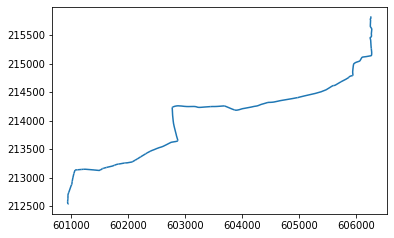

In [53]:
shortest_path_gpd.plot()

In [54]:
background = rasterio.open(str(mersea_background))
back_array = background.read(1)
palette = np.array([value for key, value in background.colormap(1).items()])
background_image = palette[back_array]
bounds = background.bounds
extent = [bounds.left, bounds.right, bounds.bottom,  bounds.top]
display_extent = [bounds.left+200, bounds.right-200, bounds.bottom+600, bounds.top-600]

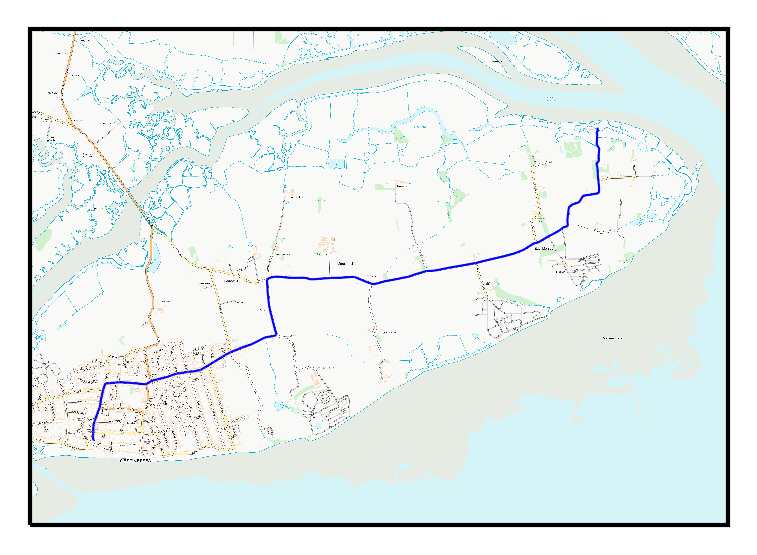

In [55]:
fig = plt.figure(figsize=(3,3), dpi=300)
ax = fig.add_subplot(1,1,1, projection=ccrs.OSGB())

ax.imshow(background_image, origin="upper", extent=extent, zorder=0)

shortest_path_gpd.plot(ax=ax, edgecolor="blue", linewidth=0.5, zorder=2)

ax.set_extent(display_extent, crs=ccrs.OSGB())